In [26]:
# standard
import pandas as pd
import numpy as np
import random
import os

#sklearn
from sklearn.model_selection import train_test_split

# plots and images
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image

# others
import re
import warnings
warnings.filterwarnings("ignore")


random.seed(2)
%matplotlib inline

In [2]:
def preprocessor(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',
                           text)
    text = (re.sub('[\W]+', ' ', text.lower()) +
            ' '.join(emoticons).replace('-', ''))
    return text

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df_init = pd.read_csv('/content/drive/My Drive/Colab Notebooks/w266project/train_250k.csv')
print('Number of reviews:', df_init.shape[0])
#print('Unique rating values:', np.sort(df_init.rating.unique()))
df_init.head()
#df_init.to_csv('../data/train_250k.csv')

Number of reviews: 250000


,Unnamed: 0,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,...,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
0,0,59848,0.000000,"This is so cool. It's like, 'would you want yo...",0.000000,0.0,0.000000,0.00000,0.0,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
1,1,59849,0.000000,Thank you!! This would make my life a lot less...,0.000000,0.0,0.000000,0.00000,0.0,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
2,2,59852,0.000000,This is such an urgent design problem; kudos t...,0.000000,0.0,0.000000,0.00000,0.0,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
3,3,59855,0.000000,Is this something I'll be able to install on m...,0.000000,0.0,0.000000,0.00000,0.0,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
4,4,59856,0.893617,haha you guys are a bunch of losers.,0.021277,0.0,0.021277,0.87234,0.0,0.0,...,2006,rejected,0,0,0,1,0,0.0,4,47


In [5]:
df_init['comment_text'] = df_init['comment_text'].apply(preprocessor)

In [6]:
# find zero-length reviews
zero_len_reviews = df_init[df_init['comment_text'].str.len().eq(1)]
print("Zero-length reviews: {}".format(zero_len_reviews.shape[0]))
display(zero_len_reviews)

Zero-length reviews: 29


,Unnamed: 0,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,...,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
8813,8813,253136,0.0,k,0.0,0.0,0.0,0.0,0.0,NaN,...,50025,approved,0,0,0,0,0,0.0,0,10
10598,10598,255298,0.0,,0.0,0.0,0.0,0.0,0.0,NaN,...,97854,approved,0,0,0,0,0,0.0,0,10
23946,23946,271308,0.0,a,0.0,0.0,0.0,0.0,0.0,NaN,...,98501,approved,0,0,0,0,0,0.0,0,4
58305,58305,313335,0.1,,0.0,0.0,0.1,0.1,0.0,NaN,...,75668,approved,0,0,0,1,0,0.0,0,10
59512,59512,314835,0.1,,0.0,0.0,0.0,0.0,0.0,NaN,...,97560,approved,0,0,0,3,0,0.1,0,10
70442,70442,328514,0.0,,0.0,0.0,0.0,0.0,0.0,NaN,...,137511,approved,0,0,0,0,0,0.0,0,4
70468,70468,328543,0.0,k,0.0,0.0,0.0,0.0,0.0,NaN,...,137482,approved,0,0,0,0,0,0.0,0,4
70469,70469,328544,0.0,k,0.0,0.0,0.0,0.0,0.0,NaN,...,137482,approved,0,0,0,0,0,0.0,0,6
78744,78744,338945,0.0,,0.0,0.0,0.0,0.0,0.0,NaN,...,138070,approved,0,0,0,1,0,0.0,0,10
103598,103598,368918,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,...,140311,approved,0,0,0,2,0,0.0,4,10


In [7]:
# find extremely long text reviews
print('Distribution of review length:')
display(df_init.comment_text.str.len().describe())

# print number of reviews with more than 1000 tokens
print('\nReviews with more than 1000 tokens:', df_init[df_init.comment_text.str.len().gt(1000)].shape[0])

Distribution of review length:


count    250000.000000
mean        300.481880
std         271.415116
min           0.000000
25%          93.000000
50%         203.000000
75%         426.000000
max        1865.000000
Name: comment_text, dtype: float64


Reviews with more than 1000 tokens: 7


In [8]:
# remove zero length and extremely long reviews
df_init = df_init[df_init['comment_text'].str.len().gt(1) & df_init['comment_text'].str.len().le(1000)]
# print('Number of reviews:', df_init.shape[0])

In [ ]:
#remove rows with null values()
df_init = df_init.dropna(how='any',axis=0) 

Text(0.5, 0, 'Number of tokens per review')

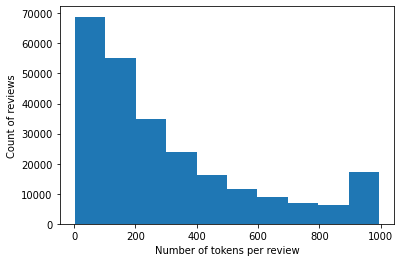

In [9]:
plt.hist(df_init.comment_text.str.len());
plt.ylabel('Count of reviews')
plt.xlabel('Number of tokens per review')

In [10]:
#check columns
df_init.describe()
#df = df_init[target	"comment_text", "severe_toxicity	obscene	identity_attack	insult	threat

,Unnamed: 0,id,target,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,parent_id,article_id,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
count,249963.000000,249963.000000,249963.000000,249963.000000,249963.000000,249963.000000,249963.000000,249963.000000,52480.000000,52480.000000,...,138598.000000,249963.000000,249963.000000,249963.000000,249963.000000,249963.000000,249963.000000,249963.000000,249963.000000,249963.000000
mean,125000.916104,395017.566660,0.099432,0.004618,0.015829,0.017587,0.078105,0.010174,0.006543,0.002508,...,397110.837415,125295.032201,0.000744,0.000220,0.000248,2.612359,0.000944,0.007576,1.439961,8.843753
std,72168.735363,88475.756983,0.195602,0.022972,0.072238,0.069221,0.173253,0.052505,0.066292,0.044216,...,88208.018569,32540.486633,0.032857,0.015874,0.017204,4.494477,0.034166,0.049104,22.527767,43.474436
min,0.000000,59848.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,61006.000000,2006.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,62500.500000,318796.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,321311.250000,103951.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
50%,125001.000000,394811.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,399687.500000,141776.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,4.000000
75%,187500.500000,470478.500000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,471661.250000,145683.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,6.000000
max,249999.000000,549515.000000,1.000000,0.534819,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,549457.000000,149439.000000,5.000000,2.000000,2.000000,133.000000,6.000000,1.000000,1848.000000,3509.000000


In [11]:
#drop unrequired columns
df_init.head()
df = df_init[['comment_text', 'target', 'severe_toxicity',	'obscene', 'threat', 'insult', 'identity_attack']]
df.head()

,comment_text,target,severe_toxicity,obscene,threat,insult,identity_attack
0,this is so cool it s like would you want your ...,0.000000,0.000000,0.0,0.0,0.00000,0.000000
1,thank you this would make my life a lot less a...,0.000000,0.000000,0.0,0.0,0.00000,0.000000
2,this is such an urgent design problem kudos to...,0.000000,0.000000,0.0,0.0,0.00000,0.000000
3,is this something i ll be able to install on m...,0.000000,0.000000,0.0,0.0,0.00000,0.000000
4,haha you guys are a bunch of losers,0.893617,0.021277,0.0,0.0,0.87234,0.021277


In [12]:
#binarize the label columns
df['toxic'] = (df['target'] >= 0.5).astype(int)
df['severe_toxic'] = (df['severe_toxicity'] >= 0.5).astype(int)
df['obscene'] = (df['obscene'] >= 0.5).astype(int)
df['threat'] = (df['threat'] >= 0.5).astype(int)
df['insult'] = (df['target'] >= 0.5).astype(int)
df['identity_hate'] = (df['identity_attack'] >= 0.5).astype(int)

#remove the 2 extra columns
df = df.drop(columns=['target', 'identity_attack', 'severe_toxicity'])
df.head()

,comment_text,obscene,threat,insult,toxic,severe_toxic,identity_hate
0,this is so cool it s like would you want your ...,0,0,0,0,0,0
1,thank you this would make my life a lot less a...,0,0,0,0,0,0
2,this is such an urgent design problem kudos to...,0,0,0,0,0,0
3,is this something i ll be able to install on m...,0,0,0,0,0,0
4,haha you guys are a bunch of losers,0,0,1,1,0,0


In [16]:
#check counts for toxic comments
df[df.toxic == 1].sum()

comment_text     haha you guys are a bunch of losers ur a sh tt...
obscene                                                       1765
threat                                                         680
insult                                                       19507
toxic                                                        19507
severe_toxic                                                     1
identity_hate                                                 1306
dtype: object

In [14]:
#check counts for non toxic comments
df[df.toxic == 0].count()

comment_text     230456
obscene          230456
threat           230456
insult           230456
toxic            230456
severe_toxic     230456
identity_hate    230456
dtype: int64

In [ ]:
df_init.toxic.value_counts()

0    230456
1     19507
Name: toxic, dtype: int64

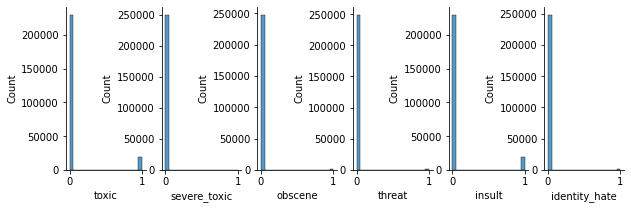

In [22]:
# rating and sentiment histogram after preprocessing
cols = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
nrows, ncols = 2, 3

f, axs = plt.subplots(1, 6, figsize=(10,3))
for idx, ax in enumerate(axs):
    sns.histplot(
    data=df,
    stat="count",
    x = cols[idx],
    ax=ax
    )

    # add labels and ticks
    ax.set(xlabel=cols[idx])
    #plt.xticks(np.arange(1,11,1))
    sns.despine()

In [23]:
# randomly draw 19000 examples from each class
temp_positive = df[df.toxic.eq(1)].sample(
    n=19000,
    replace=False
)

temp_negative = df[df.toxic.eq(0)].sample(
    n=19000,
    replace=False
)

df_balanced = pd.concat(
    [temp_positive, temp_negative],
    axis=0)

# shuffle df_balanced
df_balanced.sample(frac=1) # frac=1 retains all the data
df_balanced.reset_index(drop=True, inplace=True) # reset index

print('After preprocessing, our data contains', df_balanced.shape[0], 'reviews.')

After preprocessing, our data contains 38000 reviews.


In [24]:
# first, keep only review and sentiment from df_balanced
df_balanced.head(5)

,comment_text,obscene,threat,insult,toxic,severe_toxic,identity_hate
0,they aren t migrants they are illegal aliens c...,0,0,1,1,0,1
1,have pre existing medical conditions no insura...,0,0,1,1,0,0
2,nick hillary rotten clinton is vile and evil s...,0,0,1,1,0,0
3,why don t you worry about all the people kille...,0,0,1,1,0,0
4,when we drink stupid things happen when we tex...,0,0,1,1,0,0


In [29]:
#split the data into train and temp
df_train, df_temp, y_train, y_temp = train_test_split(df_balanced,
                                                          df_balanced[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']],
                                                          stratify=None,
                                                          test_size=(0.4),
                                                          random_state=1)
#now split the temp into train and val
df_val, df_test, y_train, y_val = train_test_split(df_temp,
                                                          df_temp[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']],
                                                          stratify=None,
                                                          test_size=(0.5),
                                                          random_state=1)

#save 3 datasets
df_train.to_csv("/content/drive/My Drive/Colab Notebooks/w266project/train_data.csv")
df_val.to_csv("/content/drive/My Drive/Colab Notebooks/w266project/validation_data.csv")
df_test.to_csv("/content/drive/My Drive/Colab Notebooks/w266project/test_data.csv")